/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9566666666666667

Classification Report:
               precision    recall  f1-score   support

       False       0.96      1.00      0.98      4593
        True       0.49      0.08      0.14       207

    accuracy                           0.96      4800
   macro avg       0.72      0.54      0.56      4800
weighted avg       0.94      0.96      0.94      4800


Mean Squared Error: 0.03328955137619109

Mean Absolute Error: 0.06963105488016169
Accuracy: 0.9566666666666667

Classification Report:
               precision    recall  f1-score   support

       False       0.96      1.00      0.98      4593
        True       0.49      0.08      0.14       207

    accuracy                           0.96      4800
   macro avg       0.72      0.54      0.56      4800
weighted avg       0.94      0.96      0.94      4800



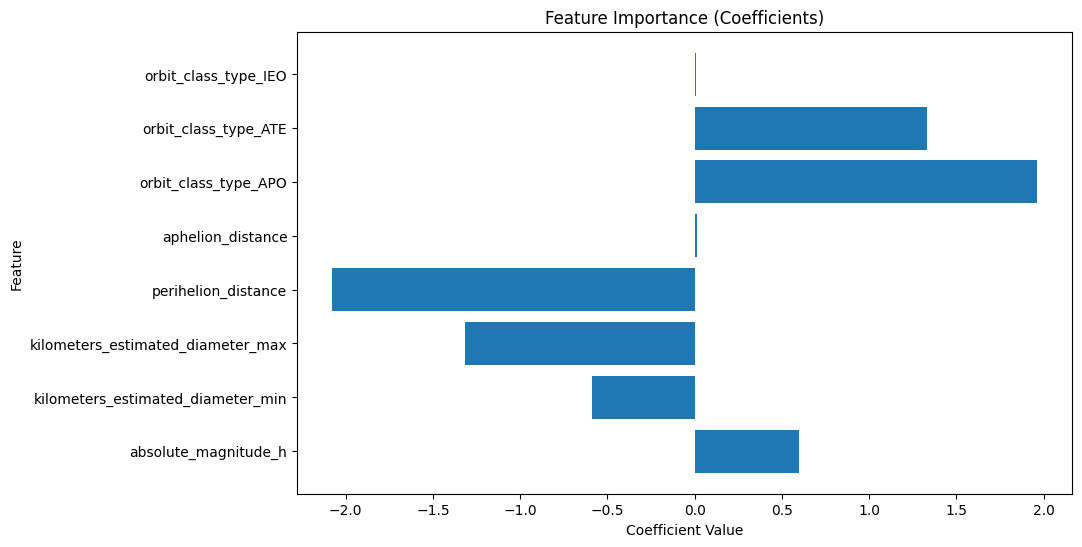

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data (replace 'neo_data.csv' with the actual filename)
neo_data = pd.read_csv('/content/NASA Near-Earth Objects.csv')


neo_data['kilometers_estimated_diameter_max']=neo_data['kilometers_estimated_diameter_max'].fillna(neo_data['kilometers_estimated_diameter_max'].mean())
neo_data['kilometers_estimated_diameter_min']=neo_data['kilometers_estimated_diameter_min'].fillna(neo_data['kilometers_estimated_diameter_min'].mean())
neo_data['absolute_magnitude_h']=neo_data['absolute_magnitude_h'].fillna(neo_data['absolute_magnitude_h'].mean())

# Select relevant columns
relevant_columns = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min',
                    'kilometers_estimated_diameter_max', 'perihelion_distance',
                    'aphelion_distance', 'orbit_class_type', 'is_sentry_object']

# Filter the data to select relevant columns
neo_data_relevant = neo_data[relevant_columns]

# One-hot encode categorical columns (orbit_class_type)
neo_data_relevant = pd.get_dummies(neo_data_relevant, columns=['orbit_class_type'], drop_first=True)

# Define features (X) and target (y)
X = neo_data_relevant.drop(columns=['is_sentry_object'])  # Features
y = neo_data_relevant['is_sentry_object']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)  # Threshold at 0.5

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred_proba))
print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred_proba))

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

# Plot feature importance (coefficients)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.coef_[0])
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      4593
        True       1.00      1.00      1.00       207

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800



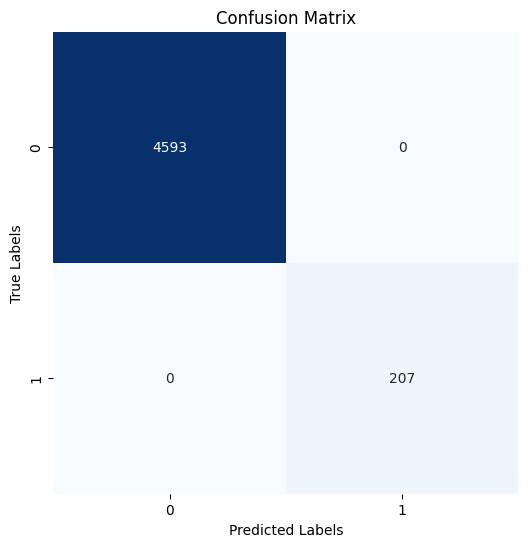

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




# Load the data (replace 'neo_data.csv' with the actual filename)
neo_data = pd.read_csv('/content/NASA Near-Earth Objects.csv')

neo_data['kilometers_estimated_diameter_max']=neo_data['kilometers_estimated_diameter_max'].fillna(neo_data['kilometers_estimated_diameter_max'].mean())
neo_data['kilometers_estimated_diameter_min']=neo_data['kilometers_estimated_diameter_min'].fillna(neo_data['kilometers_estimated_diameter_min'].mean())
neo_data['absolute_magnitude_h']=neo_data['absolute_magnitude_h'].fillna(neo_data['absolute_magnitude_h'].mean())

# Define features (X) and target (y)
X = neo_data[['absolute_magnitude_h', 'kilometers_estimated_diameter_min',
              'kilometers_estimated_diameter_max', 'perihelion_distance',
              'aphelion_distance', 'is_sentry_object']]  # Features
y = neo_data['is_sentry_object']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the SVM model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
# print("\nMean Absolute Error:", mean_absolute_error(y_test, y_pred))


# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()